<a href="https://colab.research.google.com/github/Manou-Codeur/Mini-Spotify-Clone/blob/master/Me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import scipy
from scipy import optimize as opt

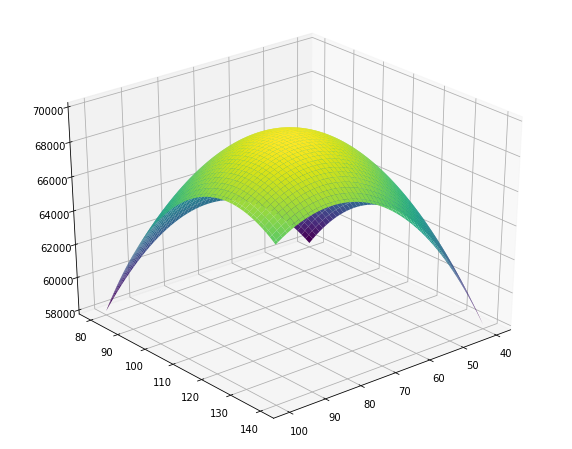

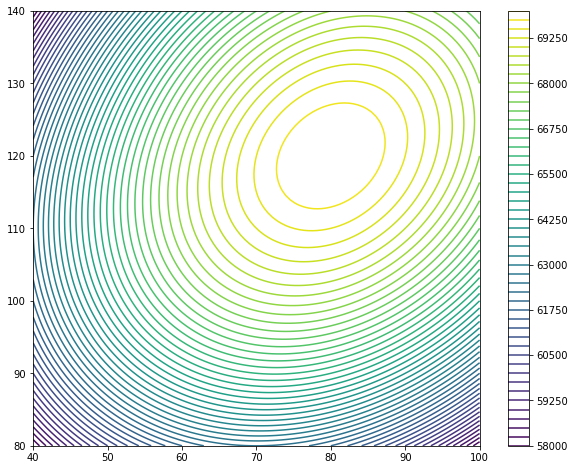

In [41]:
#Vu que l'algorithme de descente sert uniquement à trouver des minimums et qu'on cherche le maximum donc on fait f(x,y) = -f(x,y)
def minus_f(x):
    return -(500*x[0] + 1000*x[1] - 5*x[1]**2 - 5*x[0]**2 + (5/2)*x[0]*x[1]- 10000)
def f(x):
    return 500*x[0] + 1000*x[1] - 5*x[1]**2 - 5*x[0]**2 + (5/2)*x[0]*x[1]- 10000    

# construction du maillage sur [60, 100]x[100, 140]
x = np.linspace(40, 100,num=100)
y = np.linspace(80,140,num=100)
X,Y = np.meshgrid(x,y)

# evaluation de la fonction sur le maillage
Z = f([X,Y])

# graphe de la fonction
fig = plt.figure(figsize=(10,8))
ax  = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,cmap = 'viridis')
ax.view_init(30,50)

# choix de niveaux
nivs = [f([k, k]) for k in np.linspace(1, 3, 20)]

# affichage de contours
fig = plt.figure(figsize=(10,8))
plt.contour(X, Y, Z, 55)
plt.colorbar()

In [33]:
#Gradient et Matrice hessienne
A = np.array([[-5, 5/4], [5/4, -5]])
b = np.array([[500], [1000]])

X = np.array([[80],[120]])

def grad(A,b,x):
  return (A + A.T)@ x + b

def Hess(A):
  return A + A.T

print(grad(A, b, X))   
print(Hess(A))


[[0.]
 [0.]]
[[-10.    2.5]
 [  2.5 -10. ]]


-- 
 xmin = [ 80.00005392 119.99997824]
-- 
 fmin = -69999.99999998015


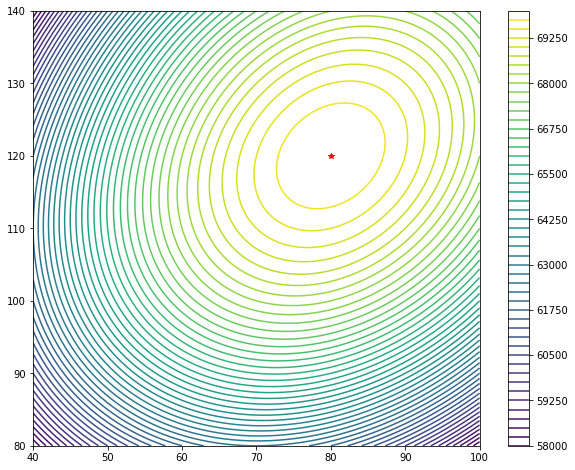

In [42]:
#les extrema de la fonction benefice sans contrainte

#calcul des extrema
x0 = [10, 50]
res = opt.minimize(minus_f, x0)

print('-- \n xmin =',res.x)
print('-- \n fmin =',res.fun)

nivs = [f([k, k]) for k in np.linspace(1, 3, 20)]

#Affichage des extrema 
fig = plt.figure(figsize=(10,8))
plt.contour(X, Y, Z, 55)
plt.plot(res.x[0], res.x[1], "r*")
plt.colorbar()

-- 
 xmin = [54.99996458 95.00003542]
-- 
 fmin = -65312.49999998434


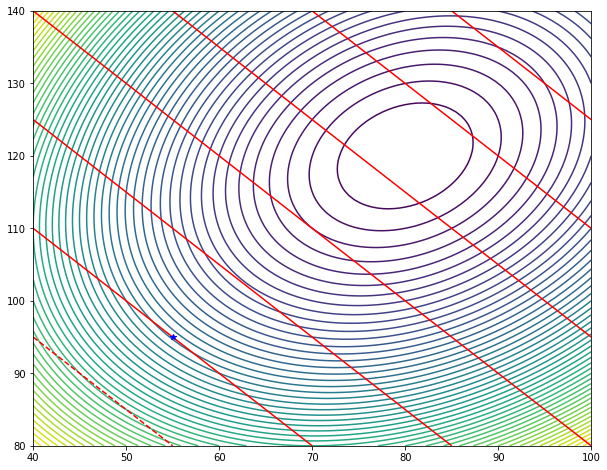

In [46]:
from matplotlib import contour
# les extrema sous contrainte de la fonction benefice
Z = minus_f([X,Y])

def phi(x) :
    return x[0] + x[1] - 150
cons = ({'type':  'eq', 'fun': lambda x: phi(x)})

# calcul des extrema
x0 = [25,75]
resc = opt.minimize(minus_f, x0, method = 'SLSQP', constraints=cons)

print('-- \n xmin =',resc.x)
print('-- \n fmin =',resc.fun)

# affichage des extrema
plt.figure(figsize=(10, 8))
plt.contour(X,Y,Z, 55)
plt.plot(resc.x[0],resc.x[1], 'b*')
plt.contour(X,Y,phi([X,Y]), colors='red')
